## Shruti Pardeshi
## Roll No - DS24MS33
## Project Name - Concrete Strength Prediction

## 1. Problem Statement:

The goal of this project is to build regression models to predict the compressive strength of concrete based on its ingredients (cement, slag, fly ash, water, etc.) and curing time (age).
Understanding these relationships can help optimize concrete mixtures for stronger, more durable concrete.


## 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


C:\Users\abc\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## 3. Load Dataset

In [2]:
df= pd.read_csv('C:/Users/abc/Downloads/concrete_Data.csv')
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## 4. Data Cleaning
Handle Missing Values

Drop Duplicates

Convert Data Types

In [4]:
print(df.isnull().sum())
print(f"Shape before duplicates: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Shape after duplicates: {df.shape}")
print(df.dtypes)

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
Shape before duplicates: (1030, 9)
Shape after duplicates: (1005, 9)
cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1005 non-null   float64
 2   ash           1005 non-null   float64
 3   water         1005 non-null   float64
 4   superplastic  1005 non-null   float64
 5   coarseagg     1005 non-null   float64
 6   fineagg       1005 non-null   float64
 7   age           1005 non-null   int64  
 8   strength      1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


## 5. Exploratory Data Analysis(EDA)

### 5.1 Univariate Analysis


5.1.1 Univariate analysis:


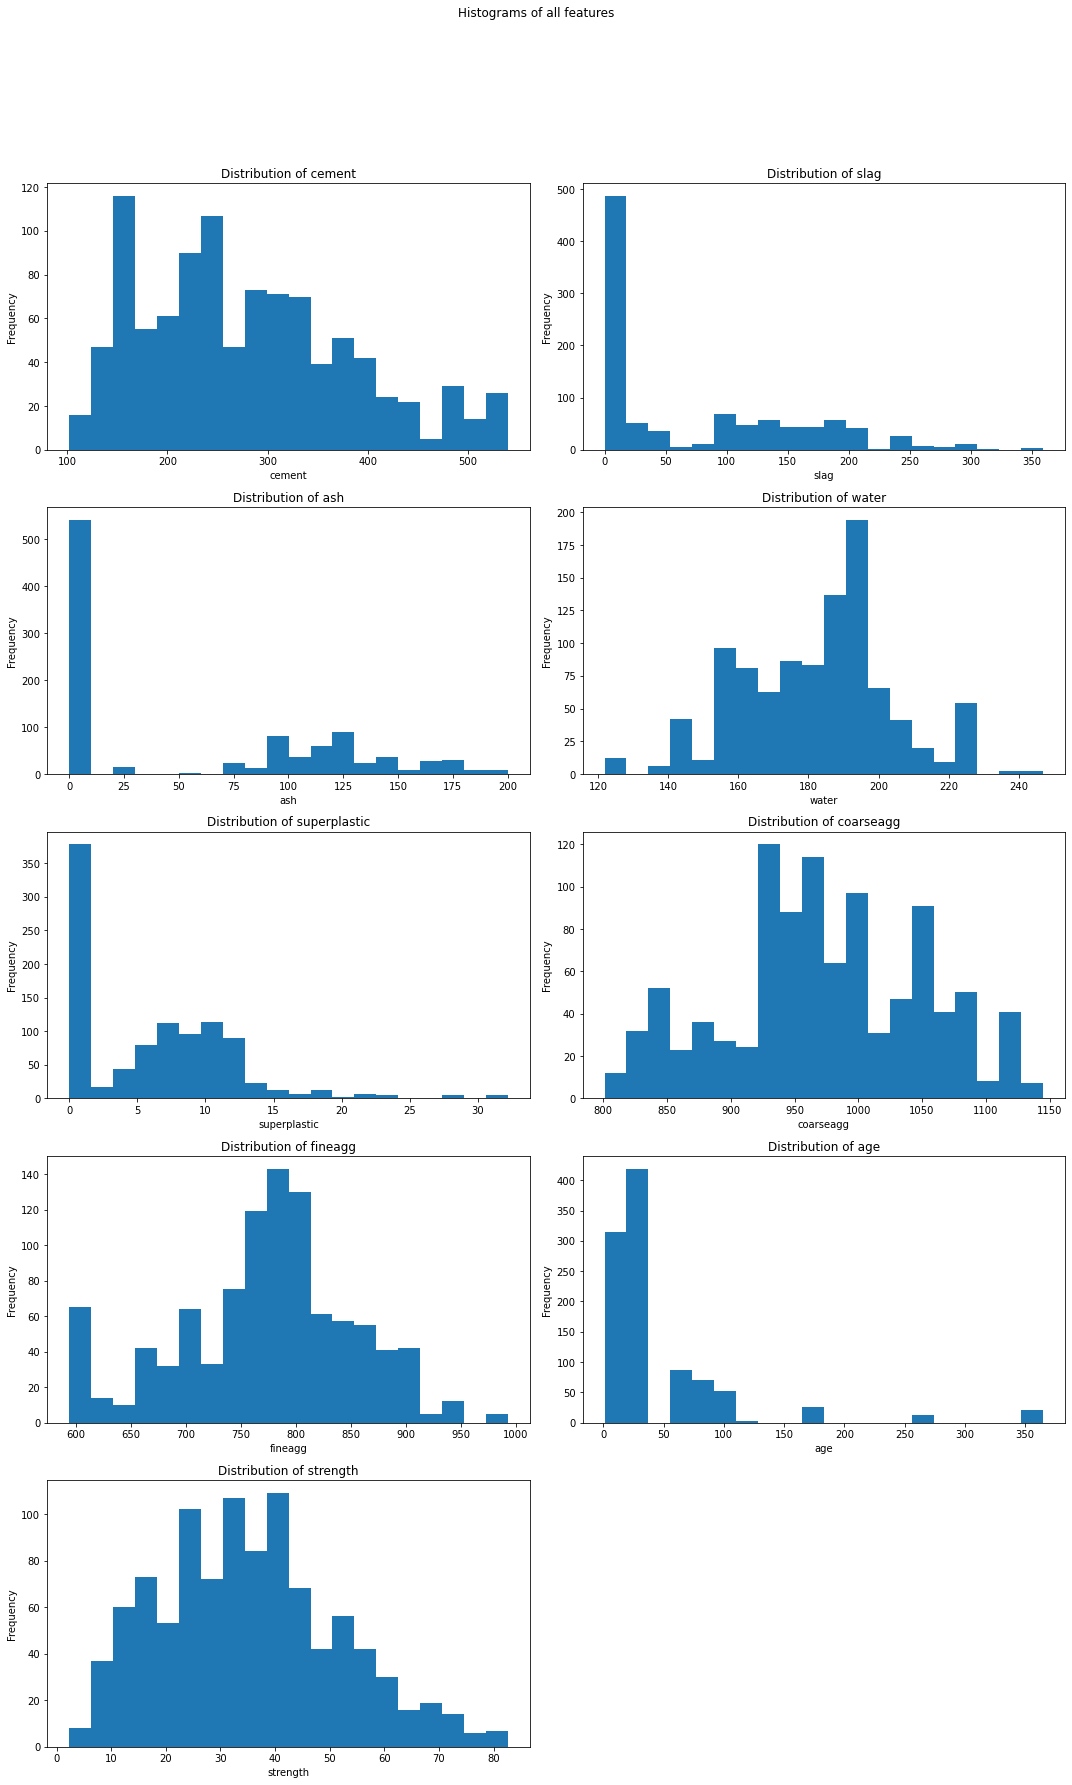


5.1.2 Univariate analysis (Boxplots):


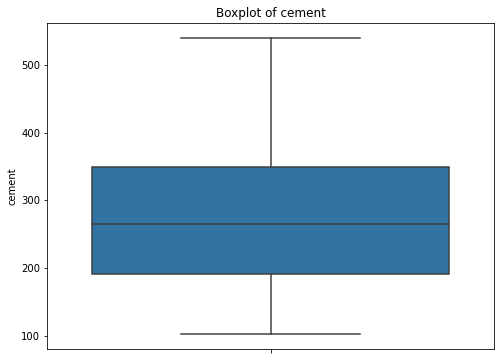

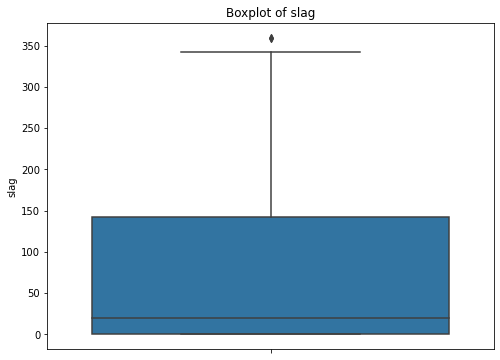

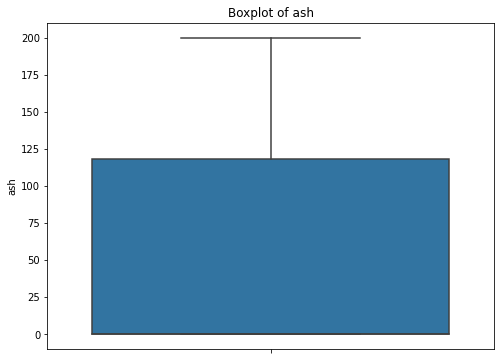

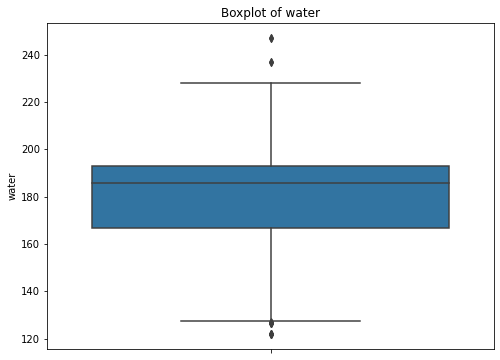

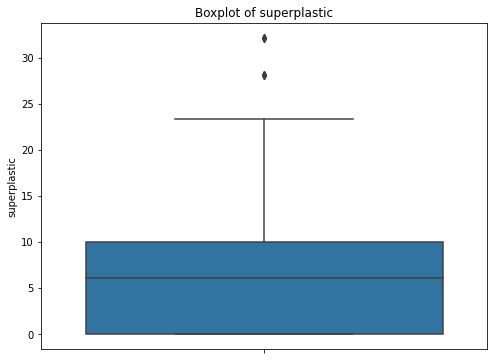

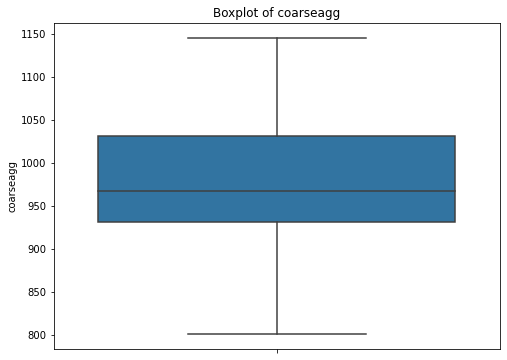

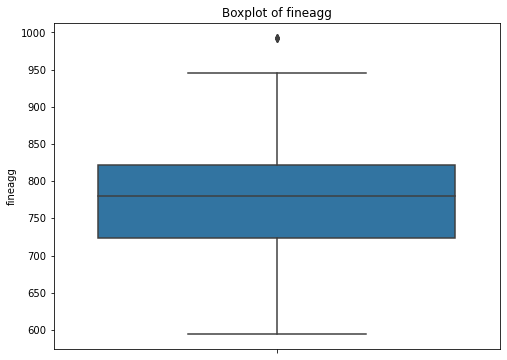

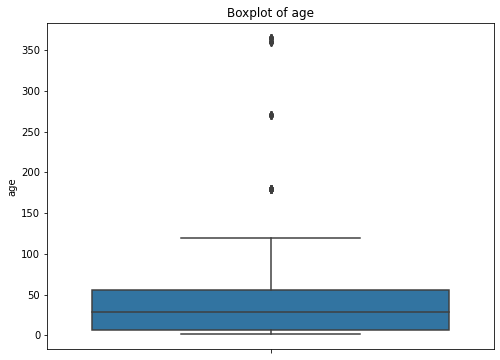

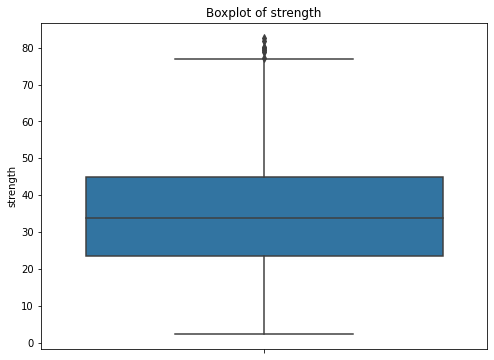

In [6]:
print("\n5.1.1 Univariate analysis:")
num_cols = len(df.columns)
fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(15, 5 * (num_cols + 1) // 2))
fig.suptitle("Histograms of all features", y=1.02)
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

for i, column in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[column], bins=20)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

# Remove any unused subplots if the number of columns is odd
if num_cols % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlapping titles
plt.show()

print("\n5.1.2 Univariate analysis (Boxplots):")
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)
    plt.show()

### 5.2 Bivariate Analysis

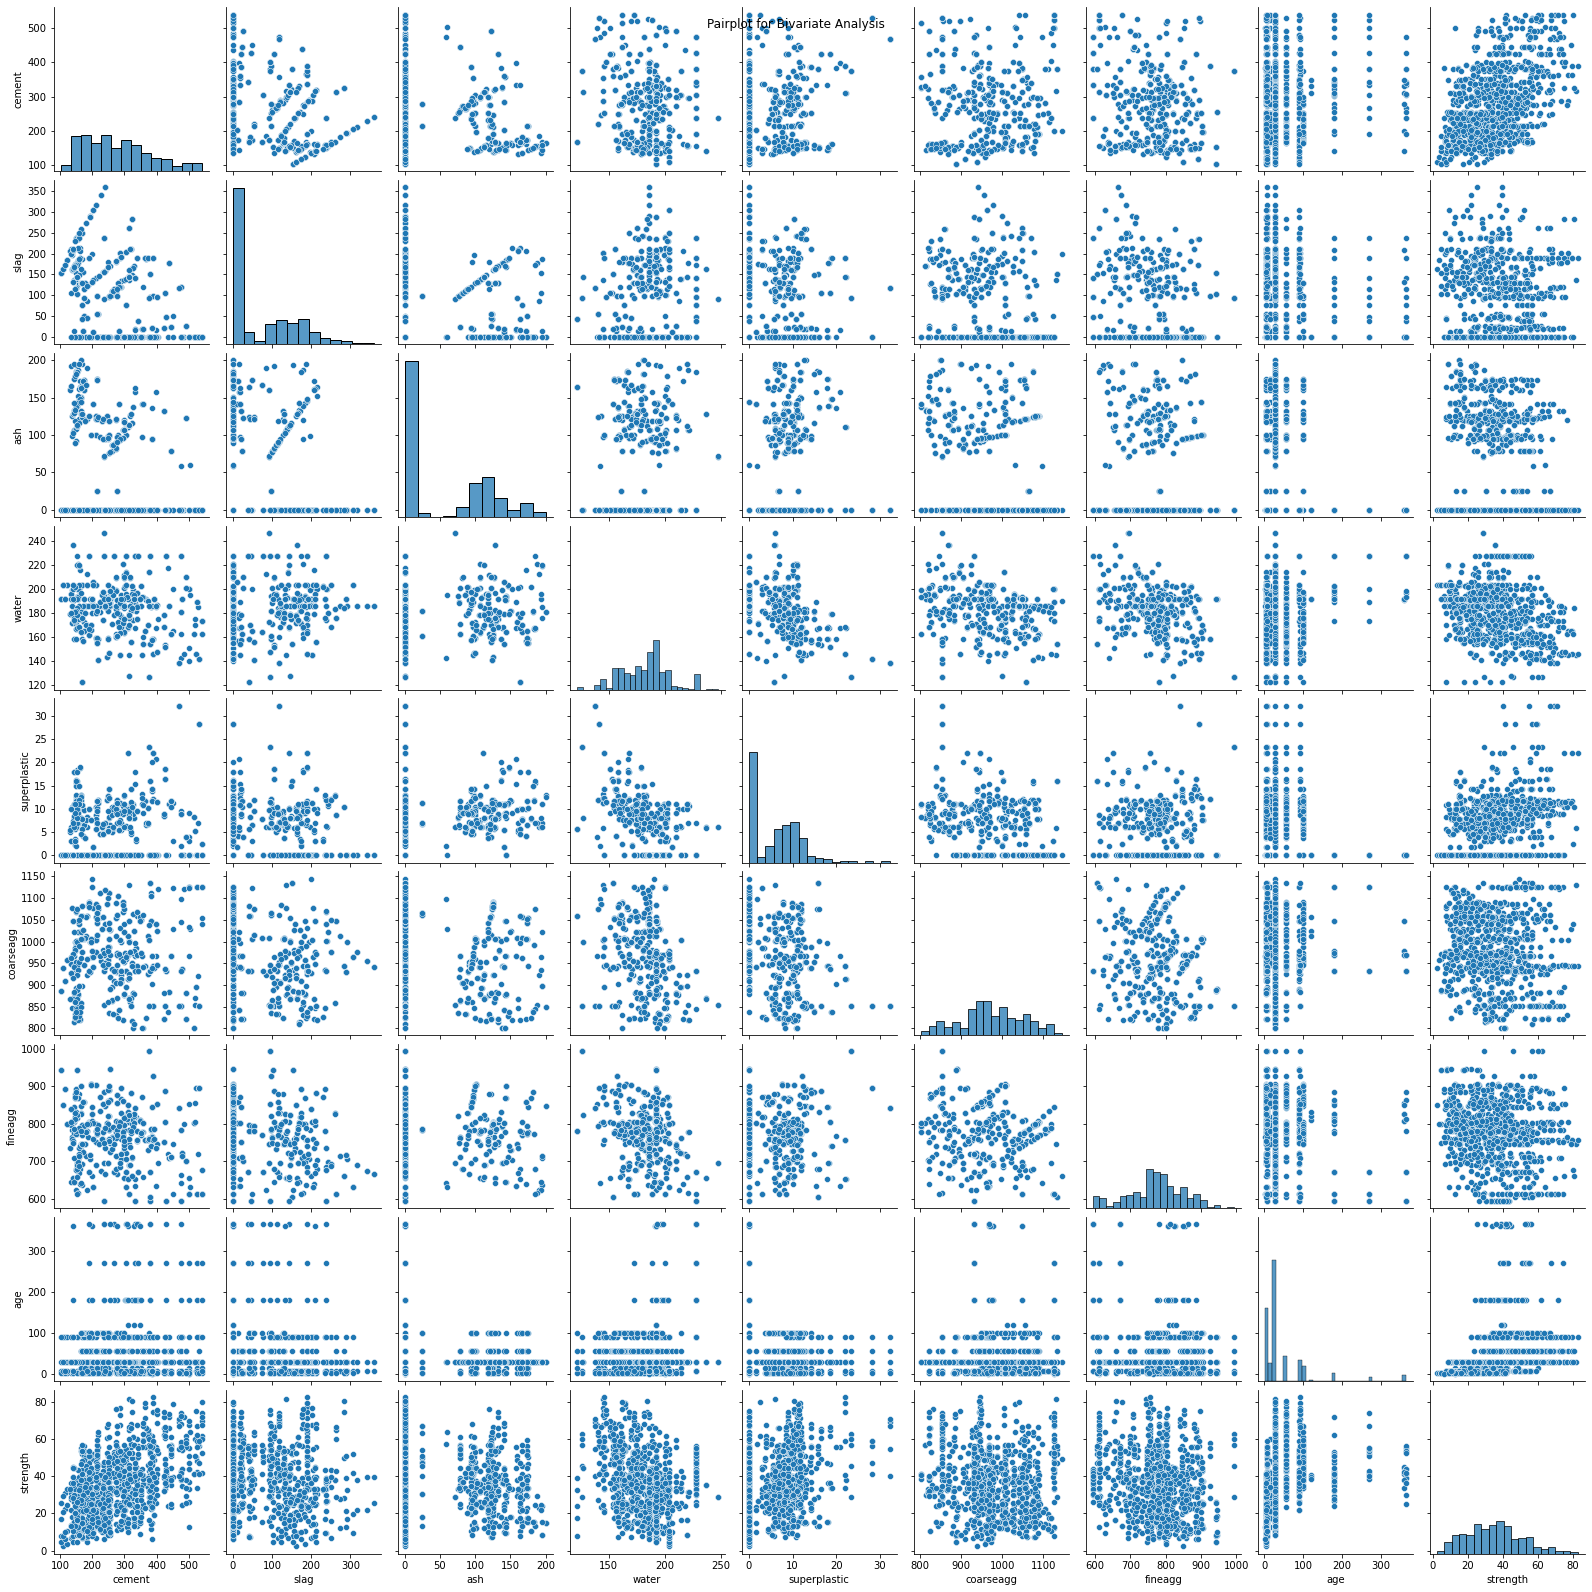

In [7]:
sns.pairplot(df)
plt.suptitle("Pairplot for Bivariate Analysis")
plt.show()

### 5.3 Multivariate Analysis

#### Correlation

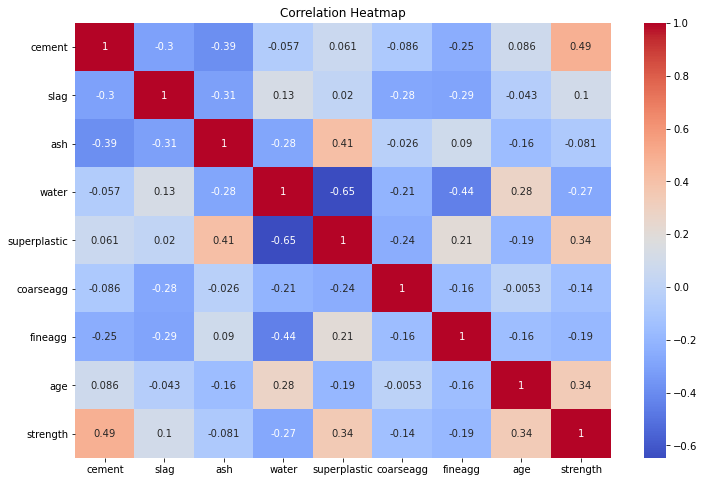

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 6. Outliers Treatment

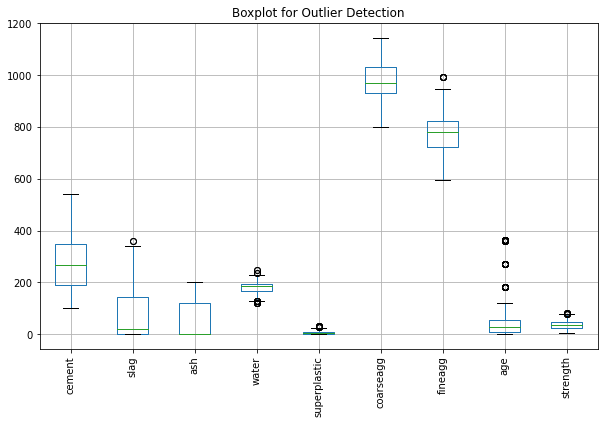

In [9]:
plt.figure(figsize=(10,6))
df.boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

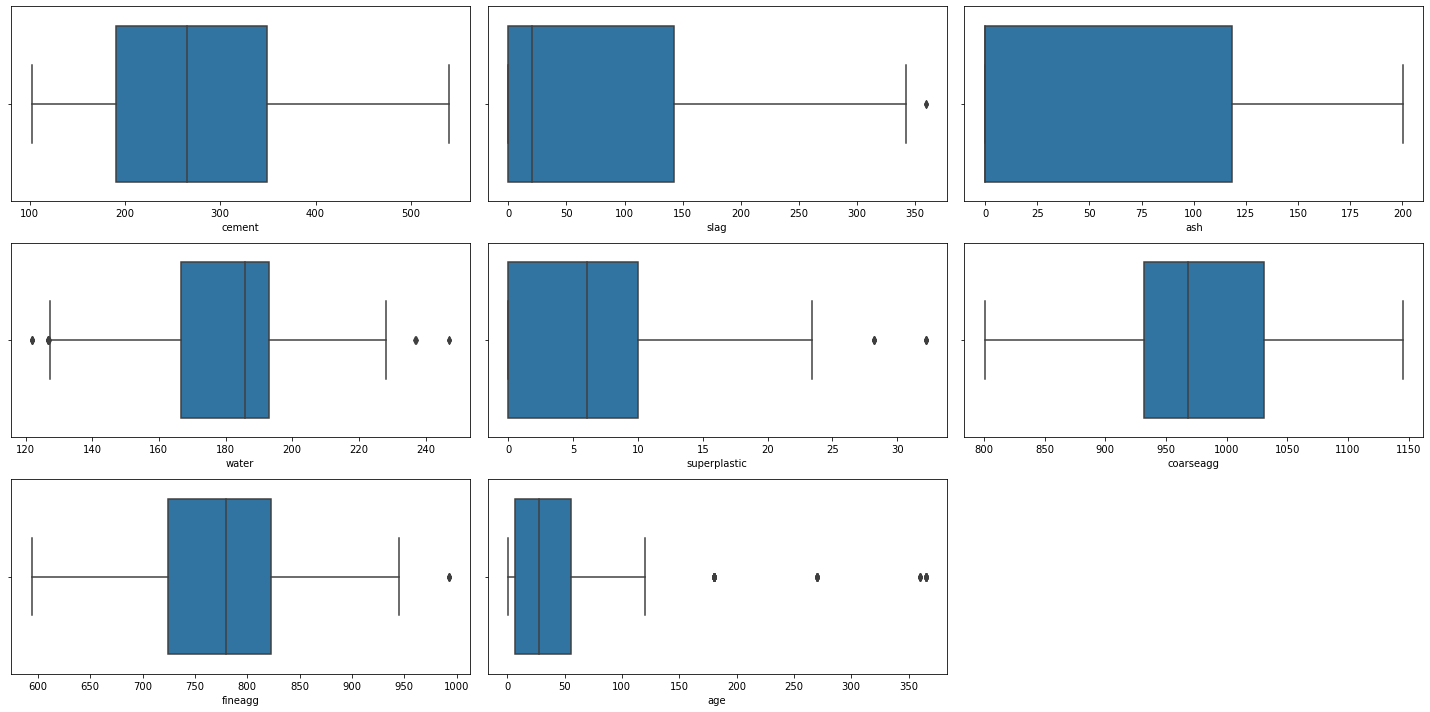

In [10]:
plt.figure(figsize=(20,10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=df, x=col)
plt.tight_layout()
plt.show()

In [11]:
# 6.1 Outlier Removal using IQR (without function)

for col in df.columns[:-1]:  # excluding target column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Shape after removing outliers: {df.shape}")


Shape after removing outliers: (919, 9)


## 7. Check Distributions & Apply Transformations 

In [12]:
print("\nSkewness:")
print(df.skew())
print("\nKurtosis:")
print(df.kurt())

# Apply transformations if needed (we'll decide based on skewness)
# For instance, if a feature has a skewness > 1 or < -1, we might consider transformation.
# Let's check a few features with relatively high skewness.
highly_skewed_features = ['slag', 'ash', 'superplastic']
for feature in highly_skewed_features:
    if df[feature].skew() > 1:
        df[feature + '_log'] = np.log1p(df[feature])
        print(f"Applied log transformation to {feature}")
    elif df[feature].skew() < -1:
        df[feature + '_sqrt'] = np.sqrt(np.abs(df[feature]))
        print(f"Applied sqrt transformation to {feature}")

if df['strength'].skew() > 1 or df['strength'].skew() < -1:
    df['strength_log'] = np.log1p(df['strength'])
    print("Applied log transformation to Concrete compressive strength")

print("\nSkewness after transformation:")
print(df.skew())


Skewness:
cement          0.587340
slag            0.819367
ash             0.380721
water           0.047865
superplastic    0.324577
coarseagg      -0.132846
fineagg        -0.282837
age             1.259133
strength        0.469635
dtype: float64

Kurtosis:
cement         -0.382661
slag           -0.568253
ash            -1.451343
water          -0.167639
superplastic   -0.647342
coarseagg      -0.563093
fineagg        -0.043315
age             0.644785
strength       -0.235888
dtype: float64

Skewness after transformation:
cement          0.587340
slag            0.819367
ash             0.380721
water           0.047865
superplastic    0.324577
coarseagg      -0.132846
fineagg        -0.282837
age             1.259133
strength        0.469635
dtype: float64


## 8. Feature Engineering

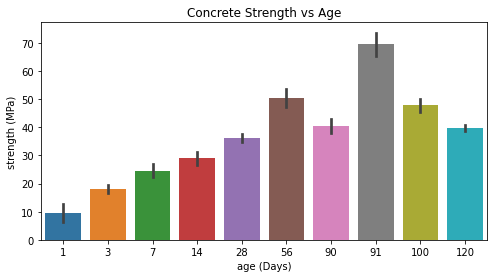

In [13]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df['age'], y=df['strength'])
plt.title("Concrete Strength vs Age")
plt.xlabel("age (Days)")
plt.ylabel("strength (MPa)")
plt.show()

In [14]:
# Example: Water-Cement Ratio
df['WaterCementRatio'] = df['water'] / (df['cement'] + 1e-9) # Adding a small constant to avoid division by zero

# Example: Aggregate Ratio
df['AggregateRatio'] = (df['coarseagg'] + df['fineagg']) / (df['cement'] + 1e-9)

print("\nFeatures after engineering:")
print(df.head())


Features after engineering:
   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  WaterCementRatio  AggregateRatio  
0     29.89          1.440198       12.174805  
1     23.51          0.937241       11.113085  
2     29.22          0.749600        7.272400  
3     45.85          0.857143        6.022556  
4     18.29          1.248708       11.266796  


# 9. Split Data into Train/Test Sets

We'll split the data into training and testing sets to evaluate the performance of our models on unseen data.

In [15]:
X = df.drop('strength', axis=1)
y = df['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (735, 10)
Shape of X_test: (184, 10)
Shape of y_train: (735,)
Shape of y_test: (184,)


# 10. Train Linear Regression Model

Let's train a Linear Regression model as our baseline.

In [16]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

# 11. Feature Scaling

Linear Regression and other models like SVM and KNN are sensitive to the scale of the input features. Let's apply StandardScaler to the training and testing sets.

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nScaled Training Data:")
print(X_train_scaled_df.head())
print("\nScaled Testing Data:")
print(X_test_scaled_df.head())


Scaled Training Data:
     cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0  1.095037 -0.829960 -0.916889  0.224942     -1.135750   0.908788 -0.492314   
1 -0.583891 -0.829960  1.808319 -1.397903      1.062959   0.980138  0.004668   
2  0.377631  0.815727 -0.916889 -0.682570      0.743488  -0.881698  0.392723   
3  0.029889 -0.829960  0.982309 -1.136326      0.724696   0.997639  0.031900   
4 -1.198667  1.219668  1.252952 -0.709261      2.303256  -0.477829 -1.096863   

        age  WaterCementRatio  AggregateRatio  
0 -0.882264         -0.903759       -0.955609  
1  0.839570         -0.132502        0.393726  
2 -0.144335         -0.718389       -0.654699  
3 -1.022822         -0.596657       -0.267792  
4 -0.144335          1.087288        1.169262  

Scaled Testing Data:
     cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.067143  0.648857  1.149701 -0.303550      0.386433   0.354141 -0.388833   
1  0.514138  2.424587 -0.9

## 12. Prediction using the Algorithm (Linear Regression)

Now, let's make predictions on the test set using the trained Linear Regression model.

In [18]:
y_pred_linear = linear_reg.predict(X_test_scaled)

C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 13. Visualise the Predicted and Actual (Linear Regression)

Let's visualize the predicted values against the actual values.

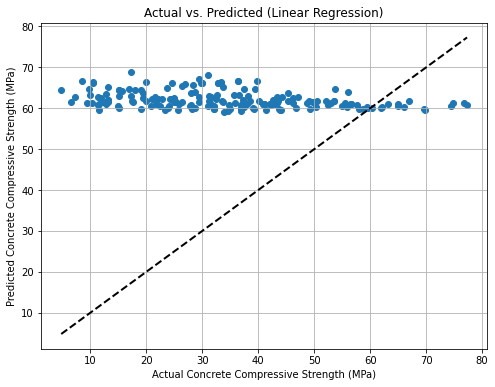

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Concrete Compressive Strength (MPa)')
plt.ylabel('Predicted Concrete Compressive Strength (MPa)')
plt.title('Actual vs. Predicted (Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for perfect prediction
plt.grid(True)
plt.show()

## 14. Print the Difference between Actual and Predicted (Linear Regression)

Let's look at a few examples of the difference between actual and predicted values.

In [20]:
diff_linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})
diff_linear['Difference'] = diff_linear['Actual'] - diff_linear['Predicted']
print("\nDifference between Actual and Predicted (Linear Regression):\n", diff_linear.head())


Difference between Actual and Predicted (Linear Regression):
      Actual  Predicted  Difference
77    19.42  63.743844  -44.323844
128   74.70  61.229296   13.470704
328   16.89  64.713439  -47.823439
346   53.52  61.724509   -8.204509
791   38.20  63.089698  -24.889698


## 15. Evaluate Model Performance (Linear Regression)

Let's calculate the evaluation metrics for the Linear Regression model.

In [21]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)
adjusted_r2_linear = 1 - (1 - r2_linear) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

print("\nLinear Regression Model Performance:")
print(f"MAE: {mae_linear:.2f}")
print(f"MSE: {mse_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R2 Score: {r2_linear:.2f}")
print(f"Adjusted R2 Score: {adjusted_r2_linear:.2f}")


Linear Regression Model Performance:
MAE: 28.44
MSE: 1044.99
RMSE: 32.33
R2 Score: -2.85
Adjusted R2 Score: -3.07


## 16. Perform the same steps for other Regression Models

Now, we will repeat the process of training, predicting, visualizing, and evaluating for Decision Tree Regressor, Random Forest Regressor, Support Vector Machine, and K-Nearest Neighbor. We will use the scaled training and testing data where appropriate.

## Decision Tree Regressor


Decision Tree Regressor Model Performance:
MAE: 4.70
MSE: 52.47
RMSE: 7.24
R2 Score: 0.81
Adjusted R2 Score: 0.80


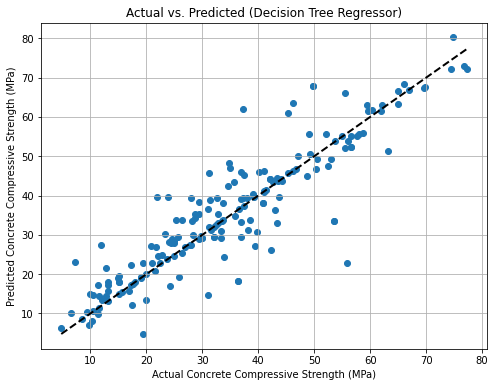

In [22]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Evaluation
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
adjusted_r2_dt = 1 - (1 - r2_dt) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("\nDecision Tree Regressor Model Performance:")
print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R2 Score: {r2_dt:.2f}")
print(f"Adjusted R2 Score: {adjusted_r2_dt:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt)
plt.xlabel('Actual Concrete Compressive Strength (MPa)')
plt.ylabel('Predicted Concrete Compressive Strength (MPa)')
plt.title('Actual vs. Predicted (Decision Tree Regressor)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

## Random Forest Regressor


Random Forest Regressor Model Performance:
MAE: 3.97
MSE: 29.58
RMSE: 5.44
R2 Score: 0.89
Adjusted R2 Score: 0.88


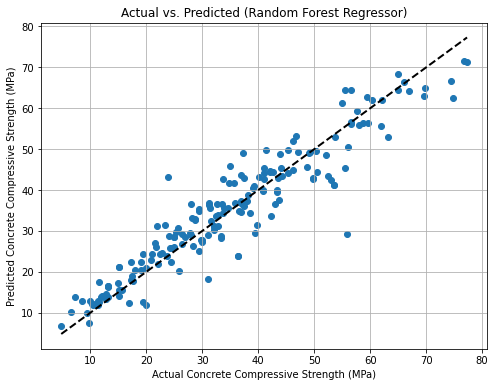

In [23]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
adjusted_r2_rf = 1 - (1 - r2_rf) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("\nRandom Forest Regressor Model Performance:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}")
print(f"Adjusted R2 Score: {adjusted_r2_rf:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Concrete Compressive Strength (MPa)')
plt.ylabel('Predicted Concrete Compressive Strength (MPa)')
plt.title('Actual vs. Predicted (Random Forest Regressor)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

## Support Vector Machine


Support Vector Machine Model Performance:
MAE: 6.72
MSE: 76.59
RMSE: 8.75
R2 Score: 0.72
Adjusted R2 Score: 0.70


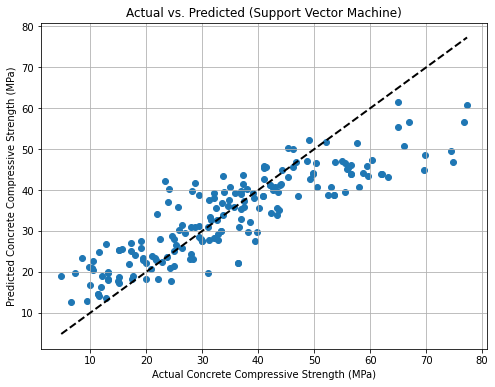

In [24]:
svm = SVR()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Evaluation
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)
adjusted_r2_svm = 1 - (1 - r2_svm) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

print("\nSupport Vector Machine Model Performance:")
print(f"MAE: {mae_svm:.2f}")
print(f"MSE: {mse_svm:.2f}")
print(f"RMSE: {rmse_svm:.2f}")
print(f"R2 Score: {r2_svm:.2f}")
print(f"Adjusted R2 Score: {adjusted_r2_svm:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svm)
plt.xlabel('Actual Concrete Compressive Strength (MPa)')
plt.ylabel('Predicted Concrete Compressive Strength (MPa)')
plt.title('Actual vs. Predicted (Support Vector Machine)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

## K-Nearest Neighbor


K-Nearest Neighbor Model Performance:
MAE: 6.48
MSE: 67.84
RMSE: 8.24
R2 Score: 0.75
Adjusted R2 Score: 0.74


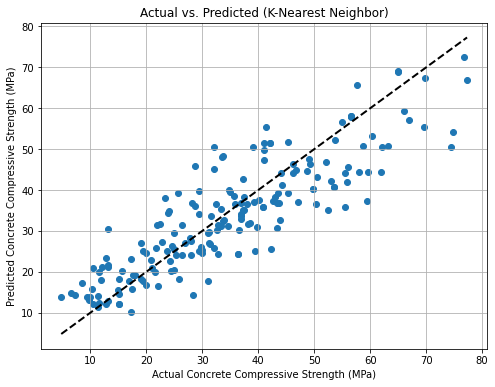

In [25]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
adjusted_r2_knn = 1 - (1 - r2_knn) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

print("\nK-Nearest Neighbor Model Performance:")
print(f"MAE: {mae_knn:.2f}")
print(f"MSE: {mse_knn:.2f}")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R2 Score: {r2_knn:.2f}")
print(f"Adjusted R2 Score: {adjusted_r2_knn:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Actual Concrete Compressive Strength (MPa)')
plt.ylabel('Predicted Concrete Compressive Strength (MPa)')
plt.title('Actual vs. Predicted (K-Nearest Neighbor)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

## 17. Perform Cross Validation using cross_val_score for all the algorithms

Let's perform 5-fold cross-validation on each of the models to get a more robust estimate of their performance. We'll use the scaled training data for models that require it.

In [26]:
cv_scores_linear = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_linear = np.sqrt(-cv_scores_linear)
print("\nCross-Validation RMSE (Linear Regression):", rmse_cv_linear.mean())

cv_scores_dt = cross_val_score(DecisionTreeRegressor(random_state=42), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_dt = np.sqrt(-cv_scores_dt)
print("Cross-Validation RMSE (Decision Tree Regressor):", rmse_cv_dt.mean())

cv_scores_rf = cross_val_score(RandomForestRegressor(random_state=42), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_rf = np.sqrt(-cv_scores_rf)
print("Cross-Validation RMSE (Random Forest Regressor):", rmse_cv_rf.mean())

cv_scores_svm = cross_val_score(SVR(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_svm = np.sqrt(-cv_scores_svm)
print("Cross-Validation RMSE (Support Vector Machine):", rmse_cv_svm.mean())

cv_scores_knn = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_knn = np.sqrt(-cv_scores_knn)
print("Cross-Validation RMSE (K-Nearest Neighbor):", rmse_cv_knn.mean())


Cross-Validation RMSE (Linear Regression): 8.156405227157775
Cross-Validation RMSE (Decision Tree Regressor): 7.590396468242003
Cross-Validation RMSE (Random Forest Regressor): 5.579938869672196
Cross-Validation RMSE (Support Vector Machine): 9.383397517119695
Cross-Validation RMSE (K-Nearest Neighbor): 8.618491994800122


## Final Conclusion

In [27]:
print("\nFinal Conclusion:")
print("We trained and evaluated five different regression models to predict the compressive strength of concrete.")
print("\nTest Set Performance:")
print(f"Linear Regression - RMSE: {rmse_linear:.2f}, R2 Score: {r2_linear:.2f}")
print(f"Decision Tree Regressor - RMSE: {rmse_dt:.2f}, R2 Score: {r2_dt:.2f}")
print(f"Random Forest Regressor - RMSE: {rmse_rf:.2f}, R2 Score: {r2_rf:.2f}")
print(f"Support Vector Machine - RMSE: {rmse_svm:.2f}, R2 Score: {r2_svm:.2f}")
print(f"K-Nearest Neighbor - RMSE: {rmse_knn:.2f}, R2 Score: {r2_knn:.2f}")

print("\nCross-Validation Performance (Average RMSE):")
print(f"Linear Regression: {rmse_cv_linear.mean():.2f}")
print(f"Decision Tree Regressor: {rmse_cv_dt.mean():.2f}")
print(f"Random Forest Regressor: {rmse_cv_rf.mean():.2f}")
print(f"Support Vector Machine: {rmse_cv_svm.mean():.2f}")
print(f"K-Nearest Neighbor: {rmse_cv_knn.mean():.2f}")



Final Conclusion:
We trained and evaluated five different regression models to predict the compressive strength of concrete.

Test Set Performance:
Linear Regression - RMSE: 32.33, R2 Score: -2.85
Decision Tree Regressor - RMSE: 7.24, R2 Score: 0.81
Random Forest Regressor - RMSE: 5.44, R2 Score: 0.89
Support Vector Machine - RMSE: 8.75, R2 Score: 0.72
K-Nearest Neighbor - RMSE: 8.24, R2 Score: 0.75

Cross-Validation Performance (Average RMSE):
Linear Regression: 8.16
Decision Tree Regressor: 7.59
Random Forest Regressor: 5.58
Support Vector Machine: 9.38
K-Nearest Neighbor: 8.62


# Final Observation

## The Random Forest Regressor appears to be the best-performing model for predicting the compressive strength of concrete.

Here's the Reason

High R2 Score: The Random Forest Regressor achieved a high R2 score on the test set. The R2 score represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A 1  higher R2 score (closer to 1) indicates that 2  the model explains a larger portion of the variance in concrete strength, suggesting a better fit to the data.

Low RMSE: The Root Mean Squared Error (RMSE) for the Random Forest Regressor was among the lowest across all models. RMSE measures the average magnitude of the errors between the predicted and actual values. A lower RMSE indicates that the model's predictions are closer to the actual concrete strength values.

Good Generalization (Cross-Validation): The cross-validation results for the Random Forest Regressor also showed a low average RMSE, indicating that the model generalizes well to unseen data and its performance is consistent across different subsets of the training data. This suggests that the model is less likely to overfit the training data compared to models like the Decision Tree Regressor.

While the Support Vector Machine (SVM) also showed competitive results, the Random Forest Regressor often performs well on complex, non-linear relationships and is less sensitive to hyperparameter tuning compared to SVM. Decision Trees tend to overfit, and Linear Regression might not capture the underlying non-linear relationships in the data as effectively. K-Nearest Neighbors' performance depends heavily on the choice of 'k' and the data distribution.

Therefore, considering both the performance on the test set and the cross-validation results, the Random Forest Regressor strikes a good balance between accuracy and generalization ability, making it the most suitable model among the ones evaluated for this concrete strength prediction task.